In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_h2_combine-varyhparams'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

import h2_combine as parent_script

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/data/


In [2]:
modelexp_nm = 'modelexp_simplev2_rs'

df = pd.read_csv(parent_script.out_dir + f'{modelexp_nm}.csv', index_col = 0)
df['R2 overall'] = df['Pearsonr (overall)']**2
df.loc[df['read_len'] == 1, 'read_len'] = 3
df.loc[df['proposal_type'] == 'smart', 'proposal_type'] = 'Default'

# hparam annotations
modelexp_df = pd.read_csv(_config.DATA_DIR + f'{modelexp_nm}.csv')
modelexp_df['Int name'] = modelexp_df['Name']

df = df.merge(modelexp_df, on = 'Int name')

print(df.columns)
print(df.shape)

df.to_csv(results_dir + f'{modelexp_nm}.csv')

Index(['Int name', 'Random seed', 'Dataset', 'Pearsonr (overall)',
       'TimewiseR count', 'TimewiseR mean', 'TimewiseR std', 'TimewiseR min',
       'TimewiseR 25%', 'TimewiseR 50%', 'TimewiseR 75%', 'TimewiseR max',
       'pace_num', 'threshold', 'read_len', 'min_gt_frequency',
       'proposal_type', 'R2 overall', 'random_seed', 'alpha_marginal',
       'beta_skew', 'dataset', 'Name'],
      dtype='object')
(956, 23)


## plot

In [3]:
mean_matrix = df.groupby(['beta_skew', 'alpha_marginal'])['R2 overall'].agg('mean').reset_index().pivot(columns = 'beta_skew', index = 'alpha_marginal', values = 'R2 overall')

display(mean_matrix)

mean_matrix.to_csv(results_dir + f'{modelexp_nm}-mean.csv')

beta_skew,0.0,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1.0
alpha_marginal,,,,,,,,,,
0.1,0.086574,0.086103,0.086636,0.086177,0.083821,0.086182,0.086648,0.086762,0.089244,0.087139
0.3,0.604652,0.602015,0.604827,0.604647,0.598121,0.605880,0.602210,0.608208,0.615843,0.385968
0.5,0.660825,0.661957,0.662023,0.661443,0.664611,0.661827,0.662793,0.663458,0.660904,0.651612
1.0,0.704220,0.704483,0.703391,0.704179,0.704374,0.703722,0.704197,0.705116,0.706567,0.704878
3.0,0.788787,0.785926,0.785719,0.786559,0.785651,0.785478,0.784730,0.785540,0.782155,0.780622
5.0,0.810305,0.810289,0.806770,0.810312,0.810342,0.810303,0.812884,0.810284,0.810389,0.810320
10.0,0.823598,0.824875,0.824882,0.824995,0.824318,0.825676,0.824854,0.824870,0.825850,0.824645
30.0,0.836460,0.836362,0.836306,0.836427,0.836325,0.836395,0.836345,0.836266,0.836184,0.835571
50.0,0.841643,0.841632,0.841646,0.841640,0.841662,0.841634,0.841600,0.841607,0.841524,0.841355


Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/results/fig_h2_combine-varyhparams/modelexp_simplev2_rs.pdf ...


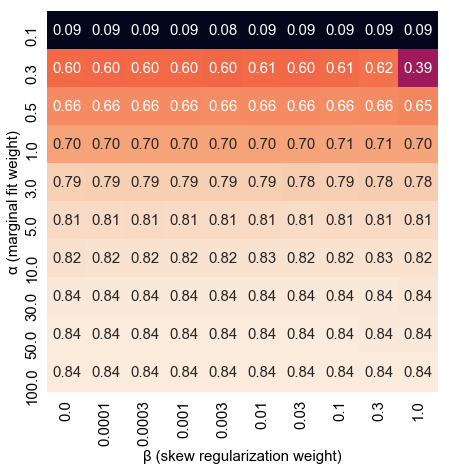

In [4]:
#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#
fig, ax = plt.subplots(figsize = (7, 7))

sns.heatmap(
    mean_matrix,
    annot = True,
    fmt = '.2f',
    cbar = False,
    ax = ax,
    yticklabels = [f'{s}' for s in mean_matrix.index],
)
# plt.yticks(rotation = 90)
plt.xlabel('β (skew regularization weight)')
plt.ylabel('α (marginal fit weight)')

# for tick in ax.get_yticklabels():
#     tick.set_rotation(90)

##

sns.despine(trim = False, bottom = True, left = True)
ax.yaxis.set_ticks_position('none') 
ax.xaxis.set_ticks_position('none') 
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = results_dir + f'{modelexp_nm}.pdf'
print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()